In [2]:
# Import necessary libraries
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

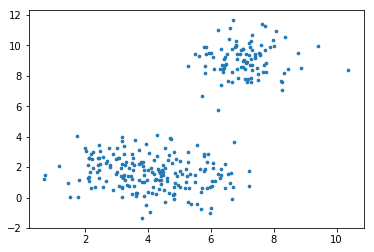

In [3]:
# Set three centers, the model should predict similar results
center_1 = np.array([3,2])
center_2 = np.array([5,1])
center_3 = np.array([7,9])

# Generate random data and center it to the three centers
data_1 = np.random.randn(100, 2) + center_1
data_2 = np.random.randn(100,2) + center_2
data_3 = np.random.randn(100,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)

[[6.05461902 2.95644198]
 [6.5295102  0.71066321]
 [5.19381758 1.06830988]]


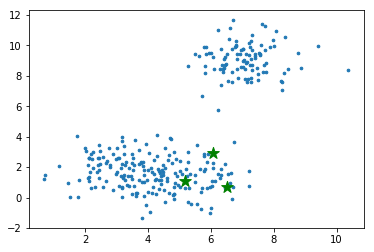

In [4]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean
print(centers)
# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [9]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)
iter = 0
# When, after an update, the estimate of that center stays the same, exit loop
# print(data)
# print(centers)
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
        print(distances[:,i])
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
#         print(data[clusters == i])
    error = np.linalg.norm(centers_new - centers_old)
    iter += 1
    print(iter)
centers_new    

[3.10397004 3.6348774  4.94934863 4.42297713 2.98593787 2.55781722
 2.77903276 3.25583514 3.39341125 2.66064708 2.34884839 3.27446904
 2.18590072 3.80909266 2.46088422 3.08176832 4.35286875 5.16563984
 2.02597244 2.83103586 3.16327077 1.90853002 2.21832008 4.0355019
 2.31256596 3.07380791 2.8304269  3.451913   5.39756206 3.01380532
 3.18543306 3.639948   3.48395696 3.29666096 3.93448699 3.86250347
 1.40124803 2.37578467 3.4476811  2.03340388 2.53535704 3.59044347
 4.11493553 2.61980745 3.94480791 2.91260086 4.37714409 4.30324316
 3.30066293 2.44092656 3.98829317 1.78834594 3.94354143 3.65121154
 5.54672286 3.05872713 3.39123005 3.06900301 2.36542509 3.03143051
 3.11024165 2.21697767 3.29737787 2.81864728 3.71443018 1.82825909
 4.62467371 3.31831503 3.31353919 3.46943542 3.75796376 4.23942343
 3.8616719  3.67137847 1.22358791 4.83941816 3.88564903 3.86483622
 3.00962548 2.60640799 2.34659135 4.02885497 4.01450733 2.10875507
 3.69475515 3.95071559 5.00556661 3.37038962 4.0885441  5.62096

array([[6.53621847, 7.67647686],
       [6.30980859, 0.67247583],
       [3.61802343, 1.43243736]])

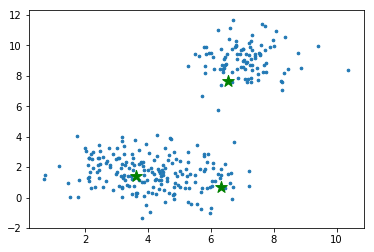

In [6]:
# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)